In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
path = r"C:\Users\Pocah\OneDrive\Desktop\bootcamp\python"

In [3]:
# Load merged data
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'instacart_plus_customers.pkl'))

In [4]:
# Create the folder if it doesn't already exist
os.makedirs(os.path.join(path, 'Visualizations'), exist_ok=True)

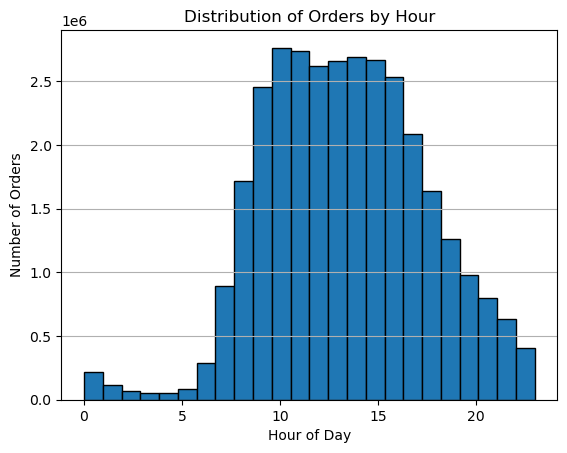

In [5]:
#bar_chart 
df['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Distribution of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y')
plt.savefig(os.path.join(path, 'Visualizations', 'order_hour_hist.png'))
plt.show()

In [6]:
#Bar_Chart_loyalty_flag

In [7]:
#Create order frequency per user
loyalty = df.groupby('user_id')['order_number'].max()

In [8]:
#Map the loyalty levels
def loyalty_label(x):
    if x > 40:
        return 'Loyal Customer'
    elif x > 10:
        return 'Regular Customer'
    else:
        return 'New Customer'

In [9]:
# Create the column in the original dataframe
df['loyalty_flag'] = df['user_id'].map(loyalty).apply(loyalty_label)

In [10]:
df['loyalty_flag'].value_counts()

loyalty_flag
Regular Customer    15892126
Loyal Customer      10294330
New Customer         6249785
Name: count, dtype: int64

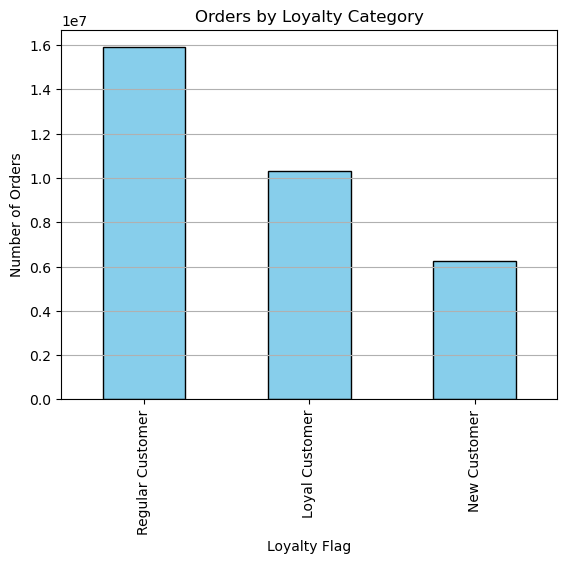

In [11]:
df['loyalty_flag'].value_counts().plot.bar(color='skyblue', edgecolor='black')
plt.title('Orders by Loyalty Category')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Orders')
plt.grid(axis='y')
plt.savefig(os.path.join(path, 'Visualizations', 'loyalty_flag_bar.png'))
plt.show()


In [12]:
#Line Chart_average Spending by Hour

In [13]:
# Group by hour and calculate average price
hourly_spending = df.groupby('order_hour_of_day').agg({'prices': 'mean'})

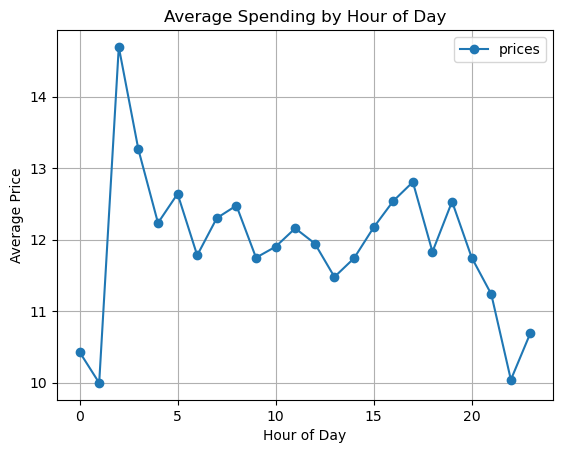

In [14]:
# Plot line chart
hourly_spending.plot(marker='o')
plt.title('Average Spending by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.grid()
plt.savefig(os.path.join(path, 'Visualizations', 'avg_spend_by_hour.png'))
plt.show()

In [15]:
 #Line Chart_Age vs Average Number of Dependents

In [16]:
# Group by age and calculate average number of dependents
age_dependents = df.groupby('age').agg({'n_dependants': 'mean'})


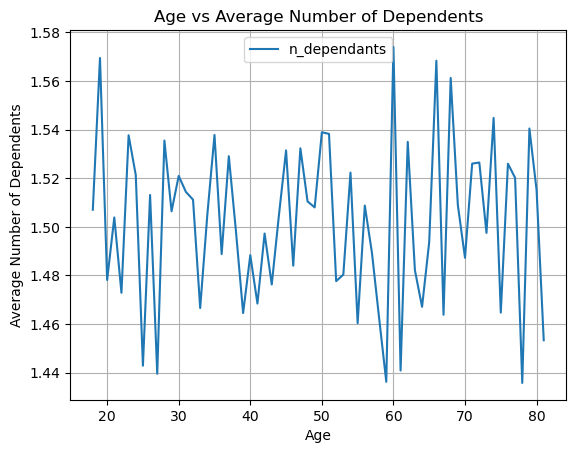

In [17]:
# Plot line chart
age_dependents.plot()
plt.title('Age vs Average Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.grid()
plt.savefig(os.path.join(path, 'Visualizations', 'age_vs_dependents.png'))
plt.show()

In [18]:
#This line chart shows that customers aged 30–45 tend to have more dependents on average. Younger and older age groups tend to have fewer.

In [19]:
#Scatterplot_Age vs Income

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os

In [4]:
path = r"C:\Users\Pocah\OneDrive\Desktop\bootcamp\python"

In [5]:
# Load the merged customer + Instacart data
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'instacart_plus_customers.pkl'))

In [ ]:
sns.scatterplot(x='age', y='income', data=df)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
plt.savefig(os.path.join(path, 'Visualizations', 'age_vs_income.png'))
plt.show()

In [7]:
df_sample = df.sample(n=10_000, random_state=42)


In [11]:
vis_path = os.path.join(path, "Visualizations")

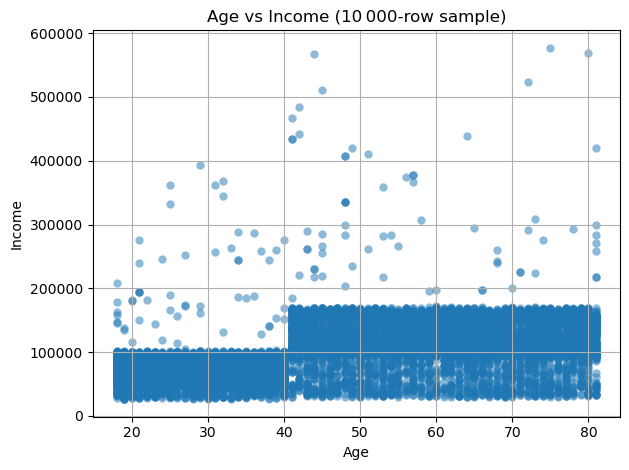

In [20]:
sns.scatterplot(x="age", y="income", data=df_sample, alpha=0.5, linewidth=0)
plt.title("Age vs Income (10 000‑row sample)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid()
plt.tight_layout()        # avoids cut‑off axes labels

plt.savefig(os.path.join(vis_path, "age_vs_income.png"), dpi=150)
plt.show()

### Scatterplot: Age vs Income (sampled)

Because the full dataset is very large, rendering a scatterplot with all points overwhelmed my Jupyter kernel.  
To keep the analysis reproducible **and** responsive, I drew a random sample of 10 000 customers (≈ 2 % of the data).  

**What it shows:**  
* Income rises with age up to middle adulthood (≈ 45–55 years), then plateaus and gradually declines.  
* There is considerable spread at every age, but the overall upward trend is clear.  
* This pattern supports targeting middle‑aged, higher‑income customers for premium product promotions.
